# EDA for UNSW_NB15

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


## merge training and testing data (only execute once)

In [ ]:
import pandas as pd

df_training = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_training-set.csv')
df_testing = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_testing-set.csv')

data = pd.concat([df_training,df_testing]).reset_index(drop=True)
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
# saving the file
data.to_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_merged.csv', index=False)

## reading new file

In [12]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_merged.csv')
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## EDA STARTS HERE

## variable inspection

In [32]:
print("\n===== Shape =====")
print(df.shape)


===== Shape =====
(257673, 44)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [31]:
df_features = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/NUSW-NB15_features.csv', encoding='latin1')
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

display(df_features)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)"
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


### Only numerical values

In [ ]:
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


### drop ID variable

In [18]:
df = df.drop('id', axis=1)
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [33]:
print("\n===== Shape =====")
print(df.shape)


===== Shape =====
(257673, 44)


### missing values

In [19]:
print(data.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

### categorical values

In [20]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state,attack_cat
count,257673,257673,257673,257673
unique,133,13,11,10
top,tcp,-,FIN,Normal
freq,123041,141321,117164,93000


In [24]:
print(df_cat['attack_cat'].value_counts().index)

Index(['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance',
       'Analysis', 'Backdoor', 'Shellcode', 'Worms'],
      dtype='object', name='attack_cat')


In [25]:
print(df_cat['proto'].value_counts().index)

Index(['tcp', 'udp', 'unas', 'arp', 'ospf', 'sctp', 'any', 'gre', 'rsvp',
       'ipv6',
       ...
       'chaos', 'argus', 'rdp', 'hmp', 'crtp', 'egp', 'netblt', 'igmp', 'icmp',
       'rtp'],
      dtype='object', name='proto', length=133)


In [26]:
print(df_cat['service'].value_counts().index)

Index(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'pop3', 'ssh', 'dhcp',
       'snmp', 'ssl', 'irc', 'radius'],
      dtype='object', name='service')


In [27]:
print(df_cat['state'].value_counts().index)

Index(['FIN', 'INT', 'CON', 'REQ', 'RST', 'ECO', 'ACC', 'PAR', 'URN', 'no',
       'CLO'],
      dtype='object', name='state')


### transform the categorical vars into categorical features

In [34]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", cat_cols)

for col in cat_cols:
    df[col] = df[col].astype('category')


Categorical Columns: ['proto', 'service', 'state', 'attack_cat']


## new summary

In [35]:
print("\n===== Numerical Summary =====")
print(df.describe())


===== Numerical Summary =====
                 dur          spkts          dpkts        sbytes  \
count  257673.000000  257673.000000  257673.000000  2.576730e+05   
mean        1.246715      19.777144      18.514703  8.572952e+03   
std         5.974305     135.947152     111.985965  1.737739e+05   
min         0.000000       1.000000       0.000000  2.400000e+01   
25%         0.000008       2.000000       0.000000  1.140000e+02   
50%         0.004285       4.000000       2.000000  5.280000e+02   
75%         0.685777      12.000000      10.000000  1.362000e+03   
max        59.999989   10646.000000   11018.000000  1.435577e+07   

             dbytes          rate           sttl           dttl         sload  \
count  2.576730e+05  2.576730e+05  257673.000000  257673.000000  2.576730e+05   
mean   1.438729e+04  9.125391e+04     180.000931      84.754957  7.060869e+07   
std    1.461993e+05  1.603446e+05     102.488268     112.762131  1.857313e+08   
min    0.000000e+00  0.000000e+0

In [36]:
print("\n===== Categorical Summary =====")
for col in cat_cols:
    print(f"\n{col} value counts:\n", df[col].value_counts())


===== Categorical Summary =====

proto value counts:
 proto
tcp     123041
udp      92701
unas     15599
arp       3846
ospf      3271
         ...  
hmp        131
rdp        131
igmp        48
icmp        15
rtp          1
Name: count, Length: 133, dtype: int64

service value counts:
 service
-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: count, dtype: int64

state value counts:
 state
FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
CLO         1
PAR         1
URN         1
no          1
Name: count, dtype: int64

attack_cat value counts:
 attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor        

## numeric features distribution

ValueError: num must be an integer with 1 <= num <= 9, not 10

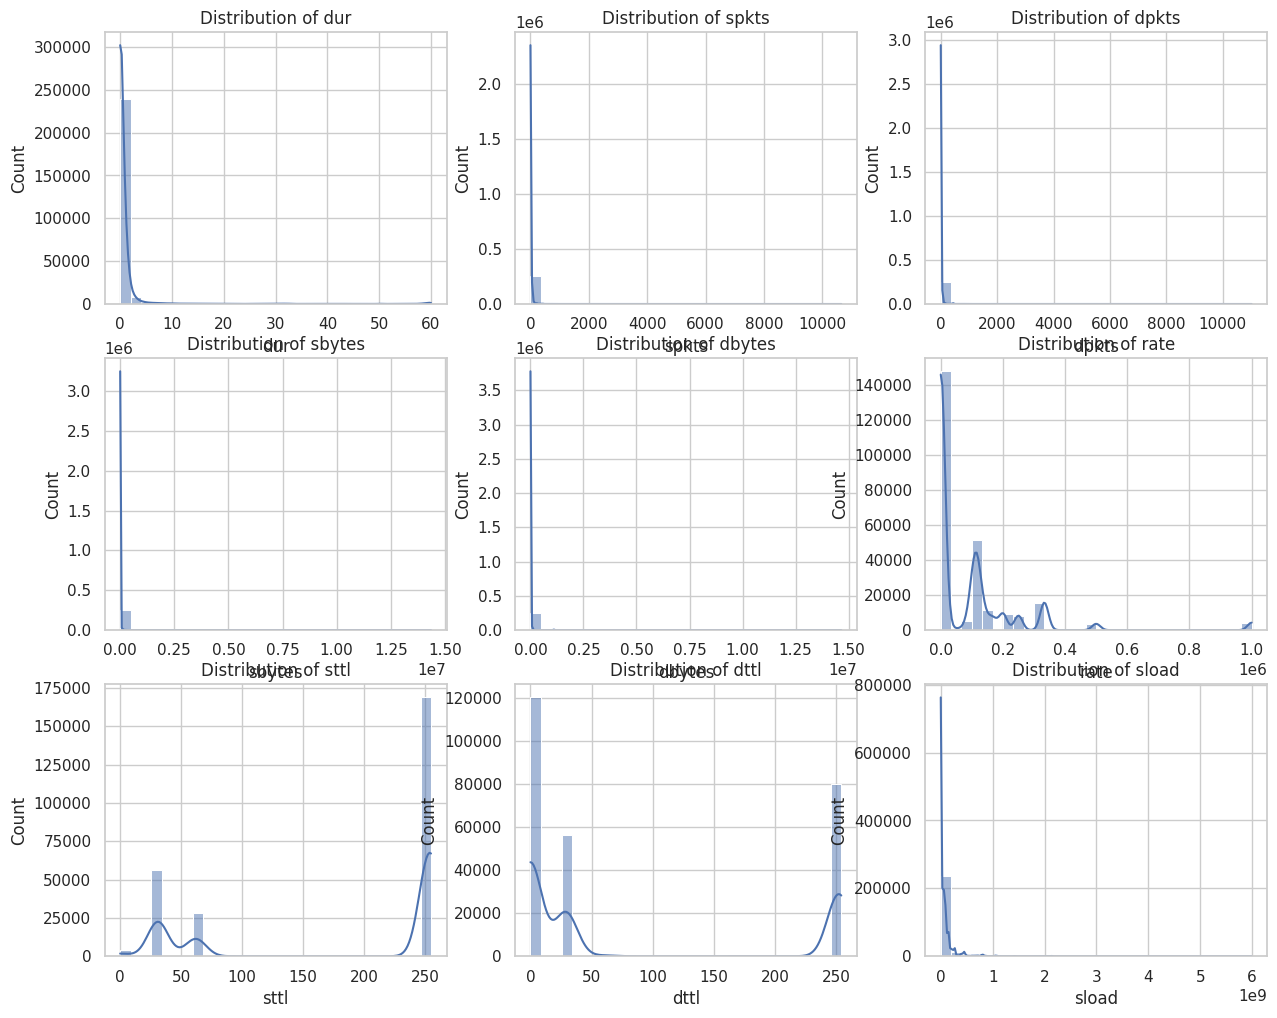

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display settings
sns.set(style="whitegrid")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 12))
# Plotting only the first 9 numeric columns for brevity
for i, col in enumerate(numeric_cols[:9], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

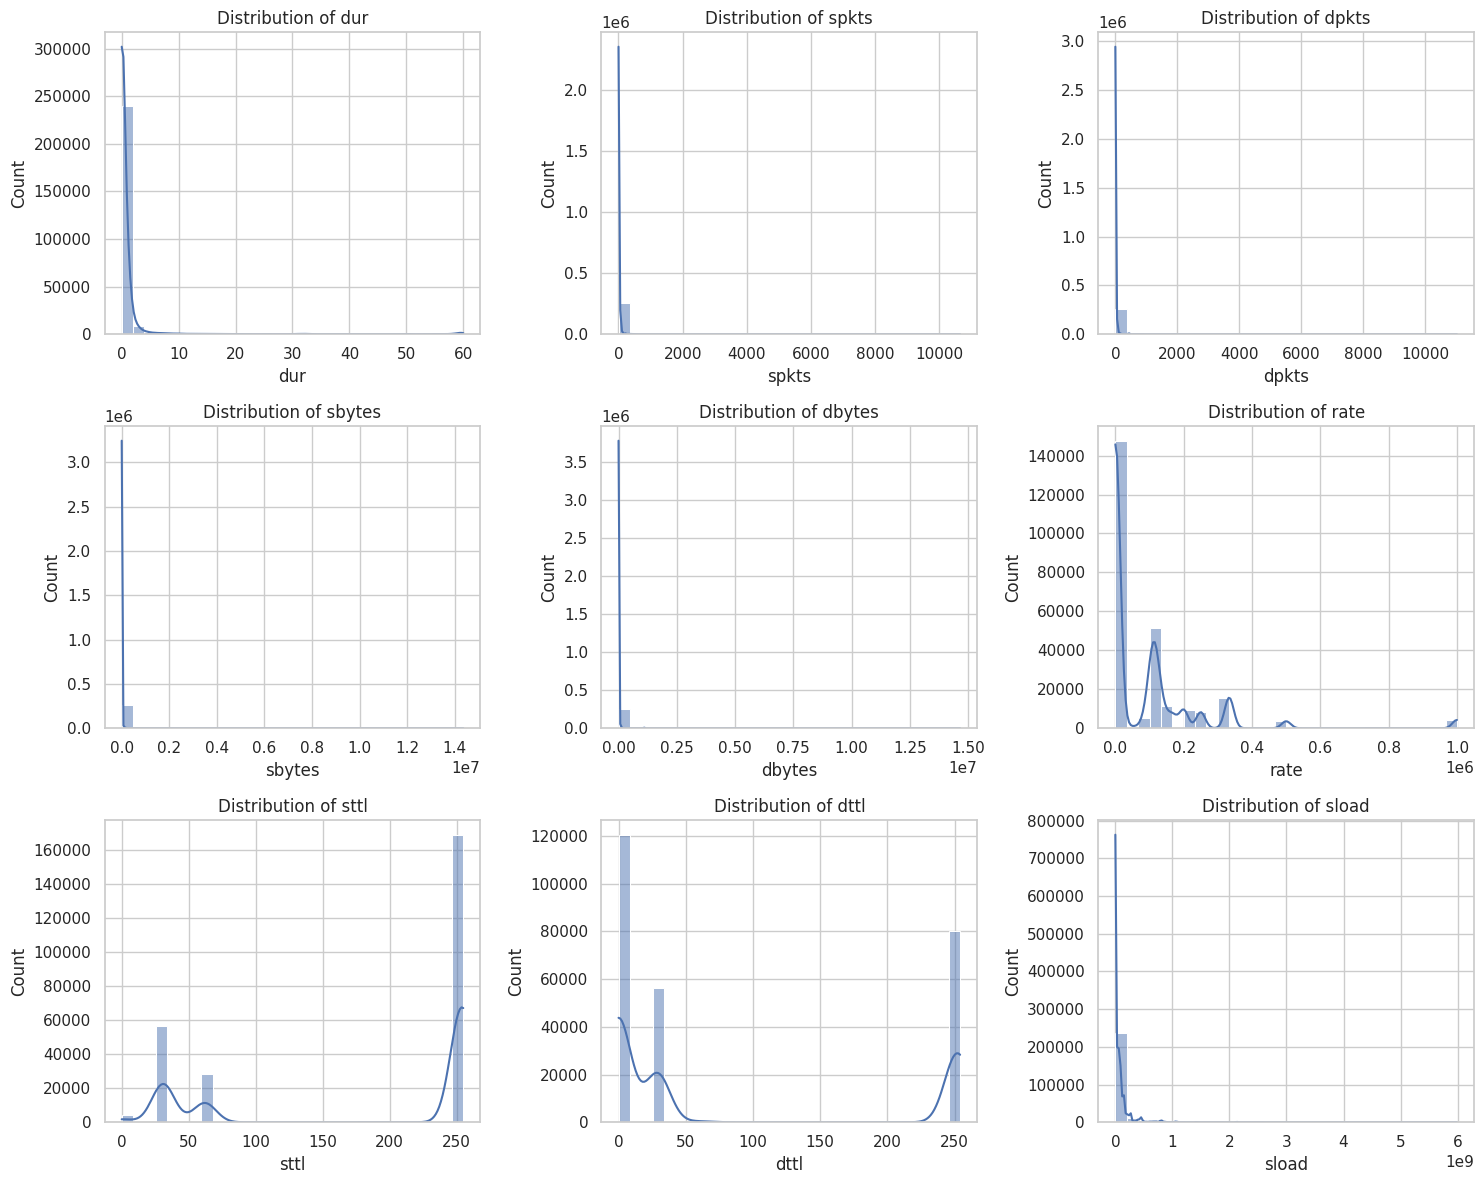

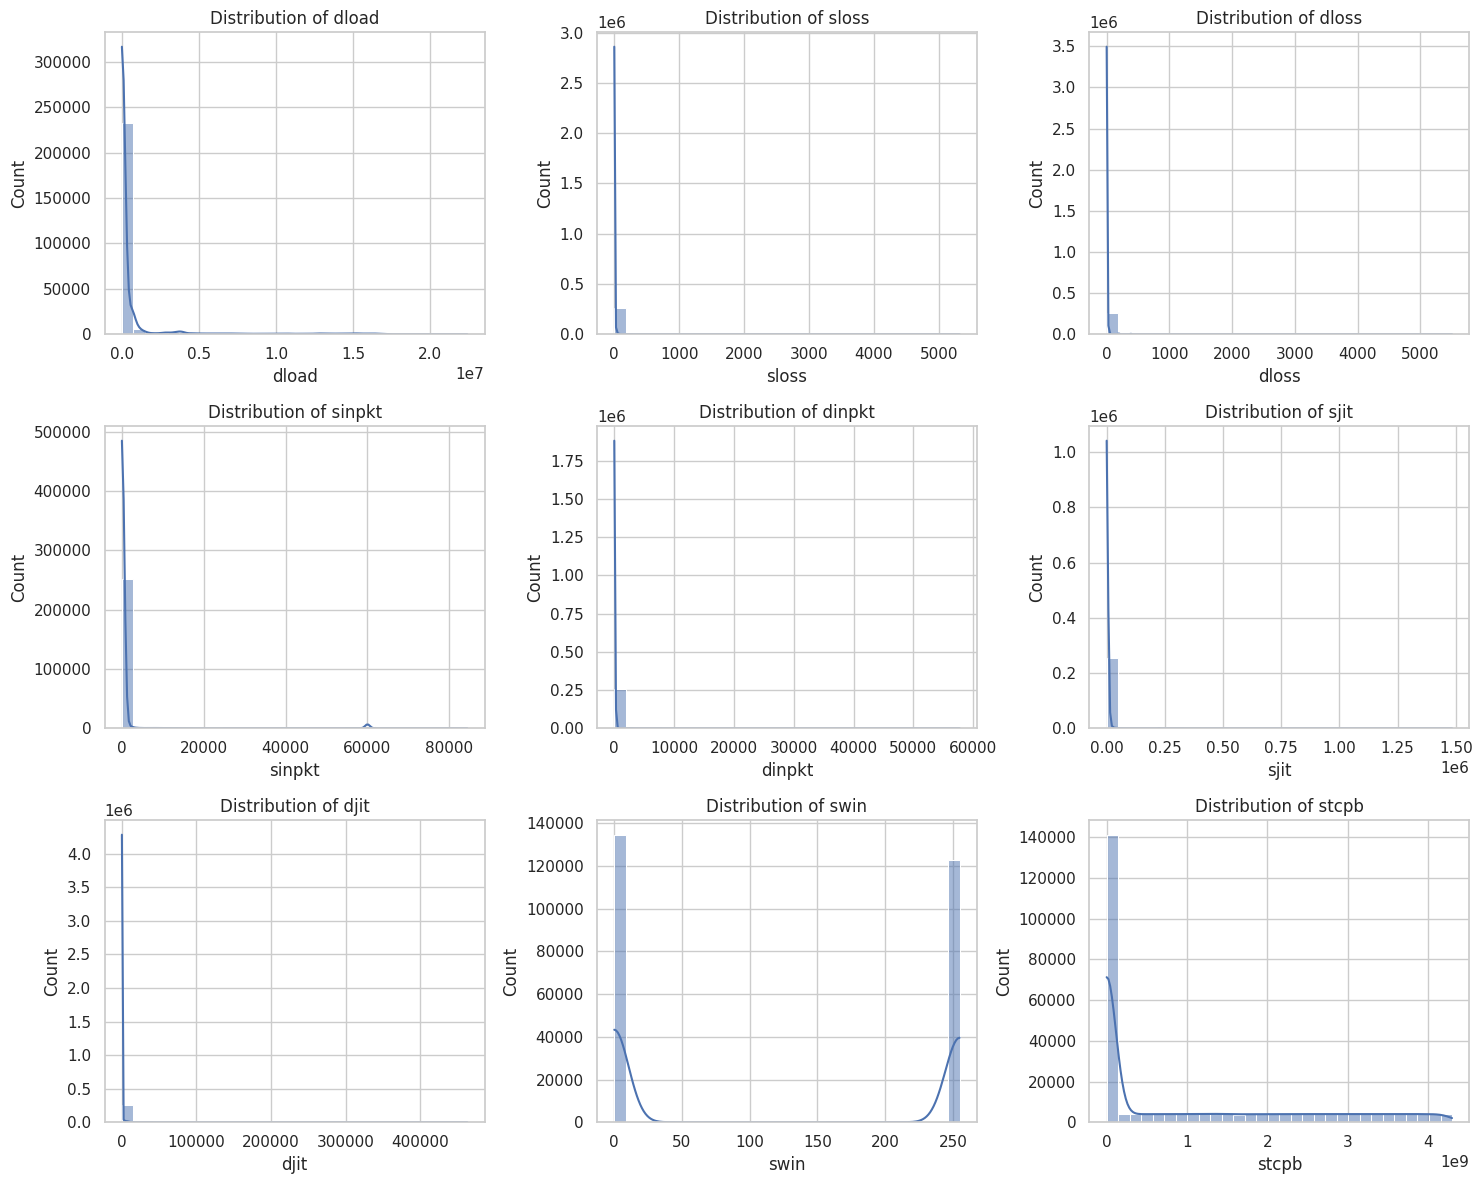

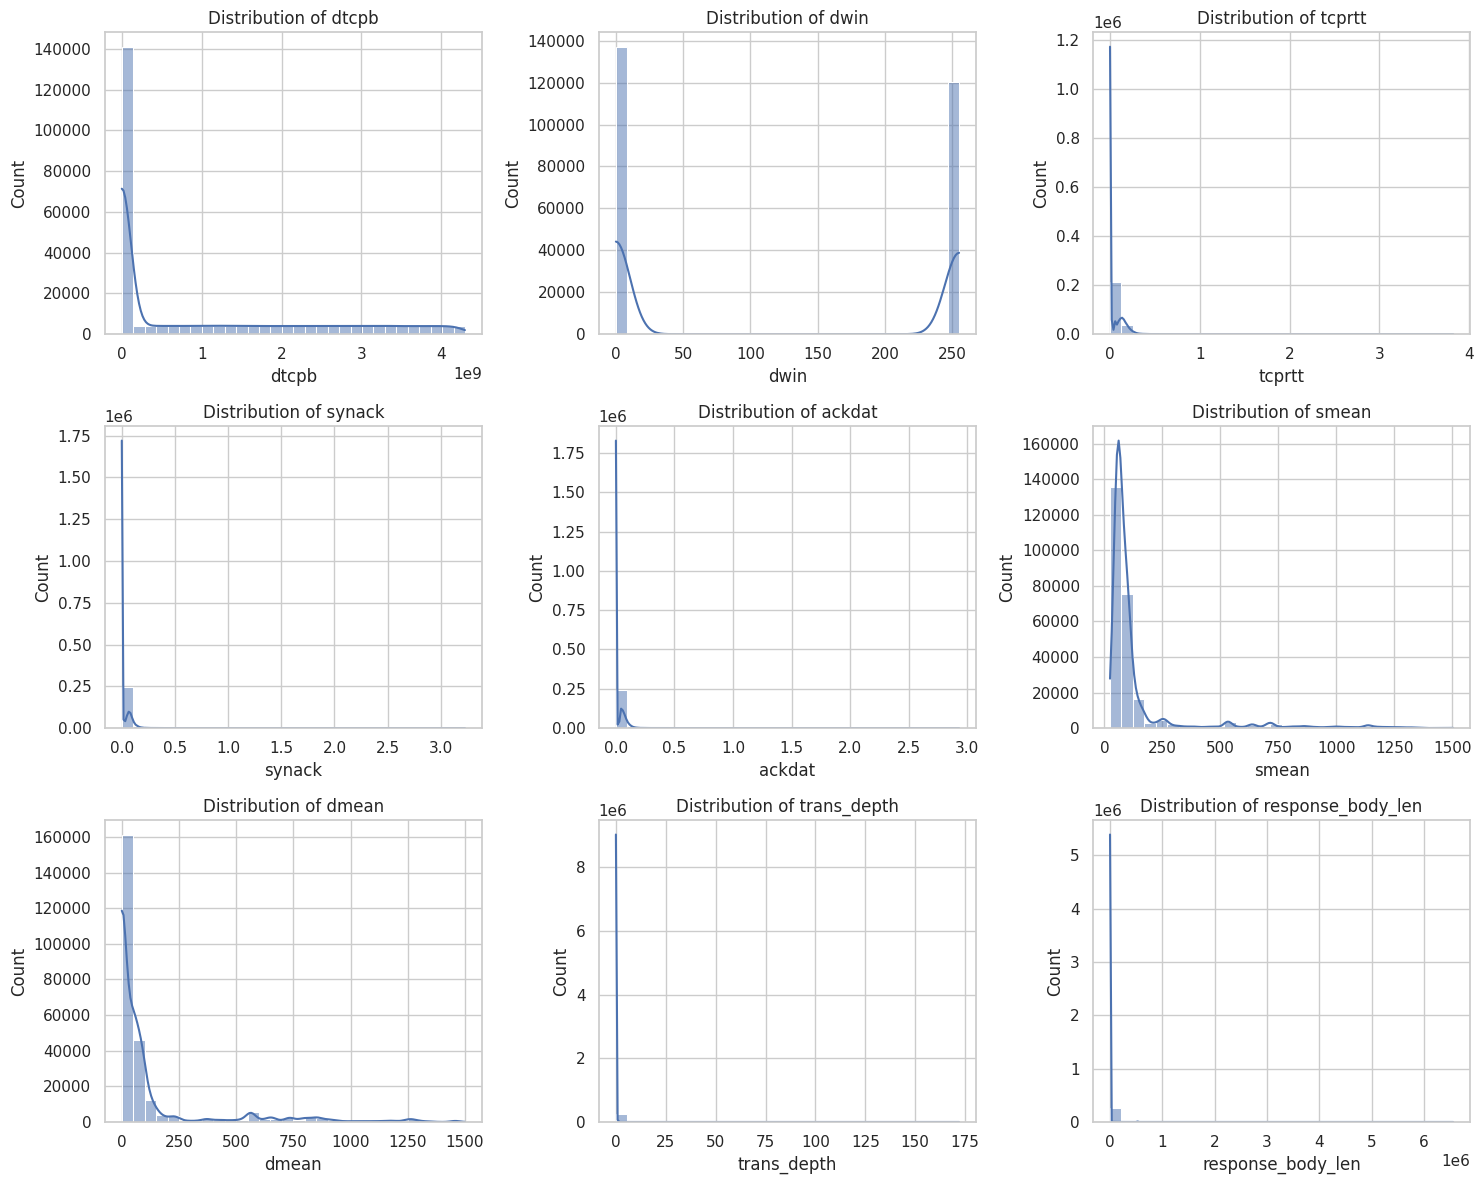

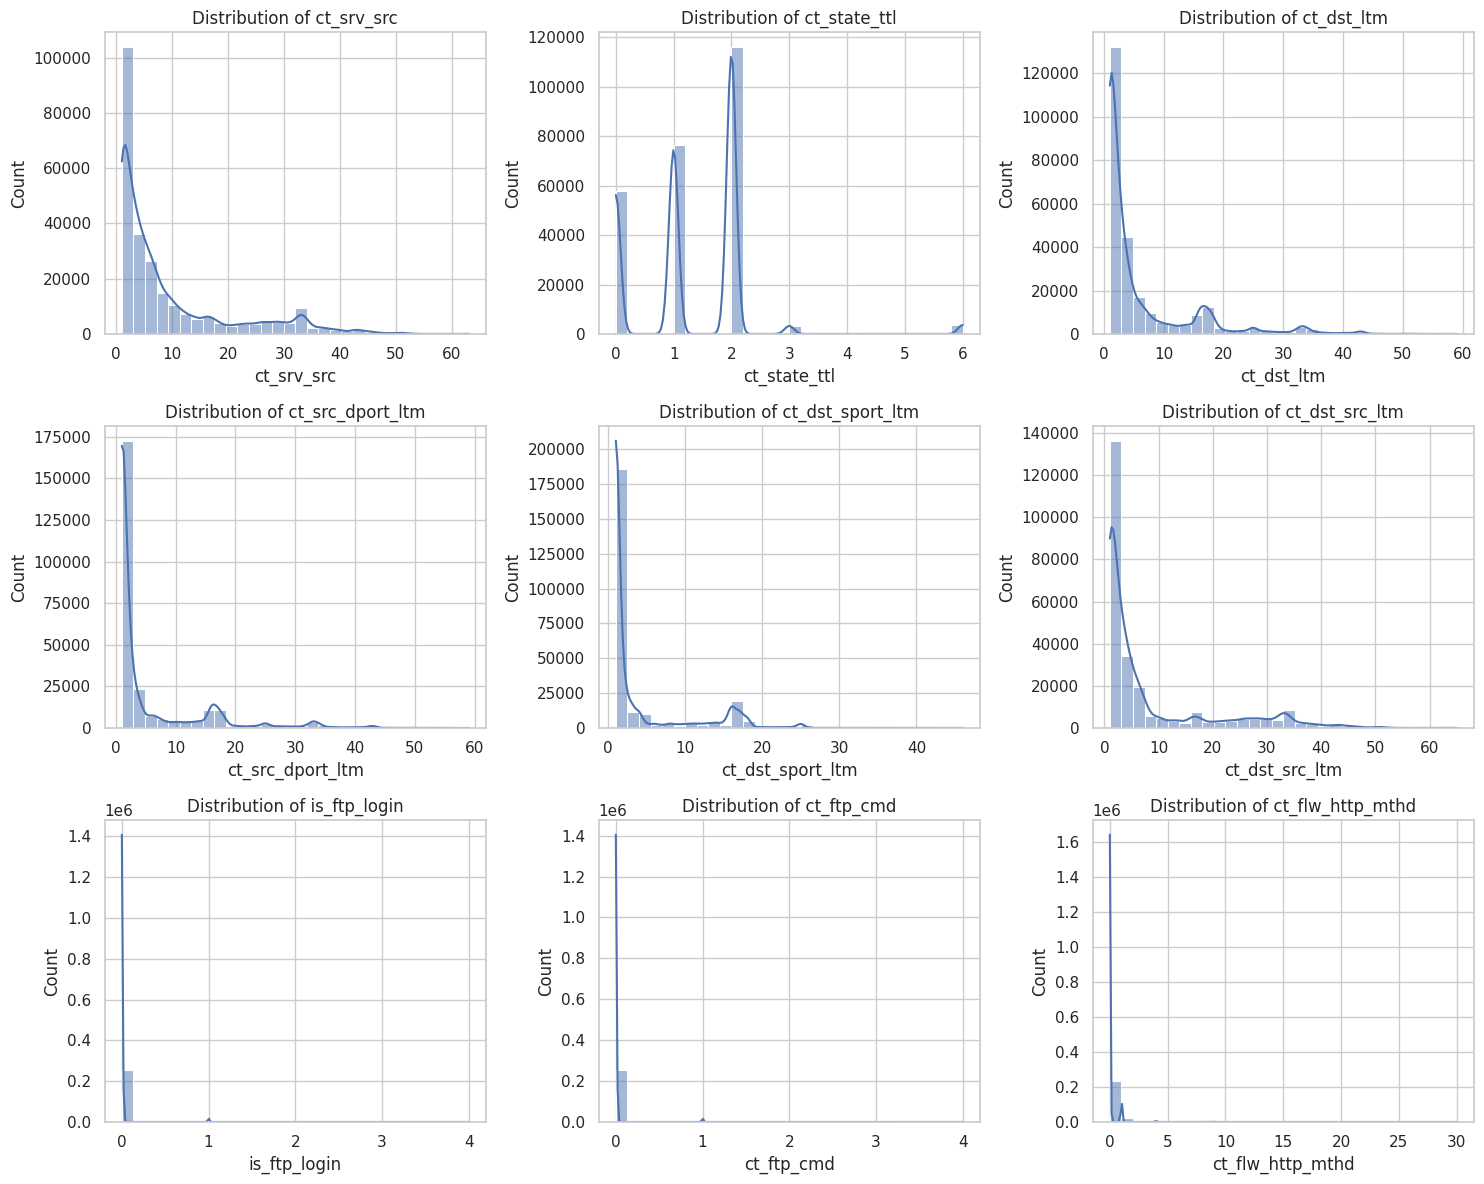

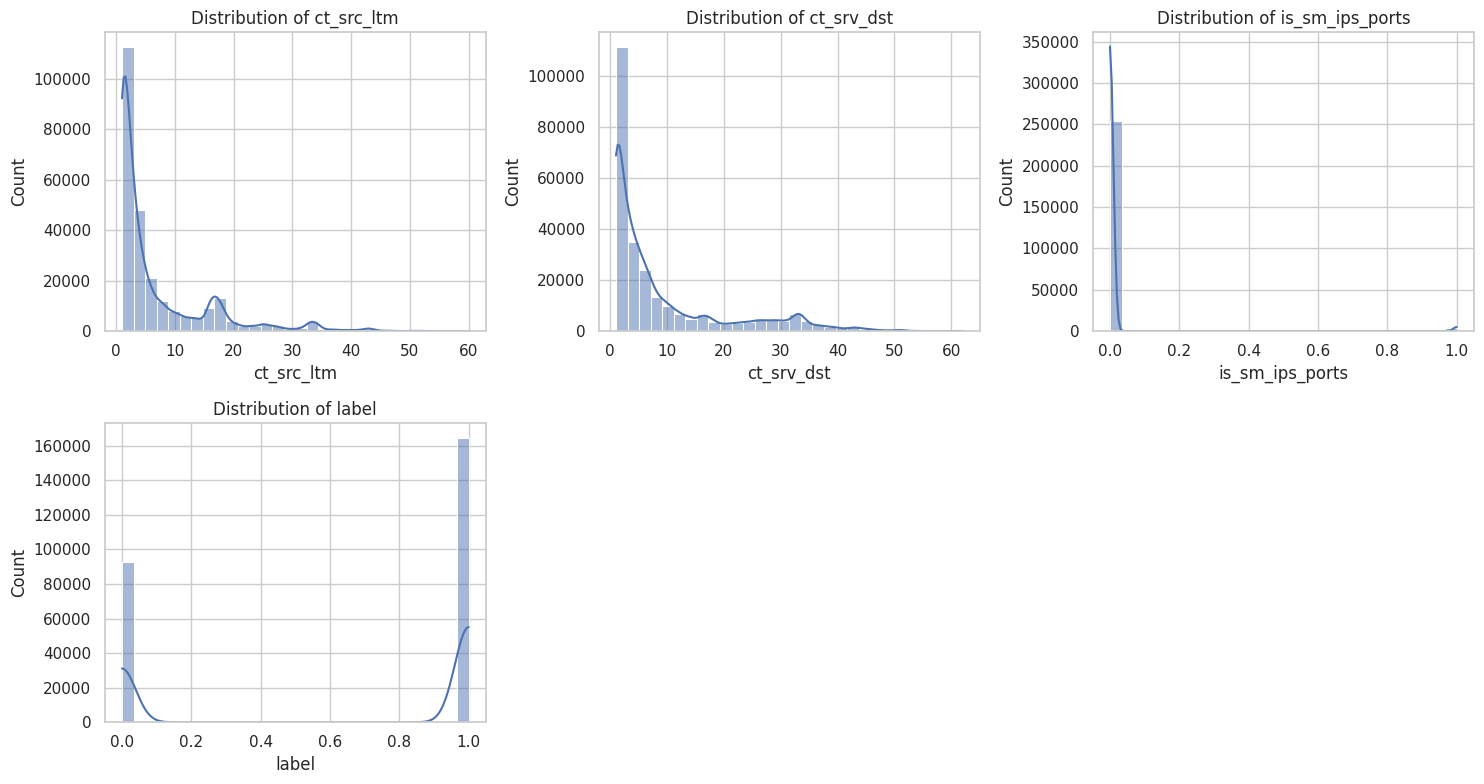

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Display settings
sns.set(style="whitegrid")

def plot_numeric_distributions(df, cols_per_plot=9):
    """Plots the distribution of all numeric columns in a DataFrame,
       creating multiple figures if necessary.

    Args:
        df (pd.DataFrame): The input DataFrame.
        cols_per_plot (int): The maximum number of columns to plot per figure.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    num_cols = len(numeric_cols)
    num_plots = math.ceil(num_cols / cols_per_plot)

    for plot_num in range(num_plots):
        start_index = plot_num * cols_per_plot
        end_index = min((plot_num + 1) * cols_per_plot, num_cols)
        current_cols = numeric_cols[start_index:end_index]

        rows = math.ceil(len(current_cols) / 3)
        cols = 3

        plt.figure(figsize=(15, rows * 4))
        for i, col in enumerate(current_cols, 1):
            plt.subplot(rows, cols, i)
            sns.histplot(df[col], kde=True, bins=30)
            plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()

# Call the function to plot distributions for all numeric columns
plot_numeric_distributions(df)

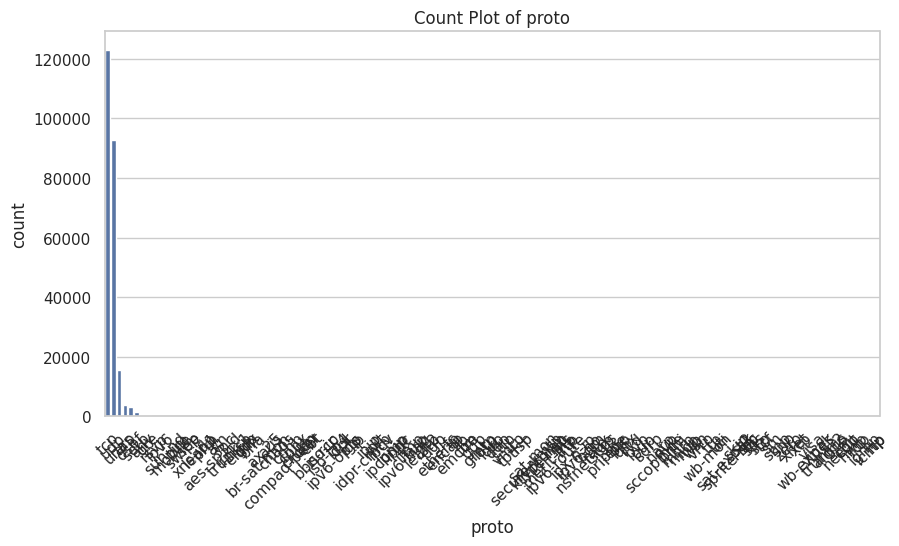

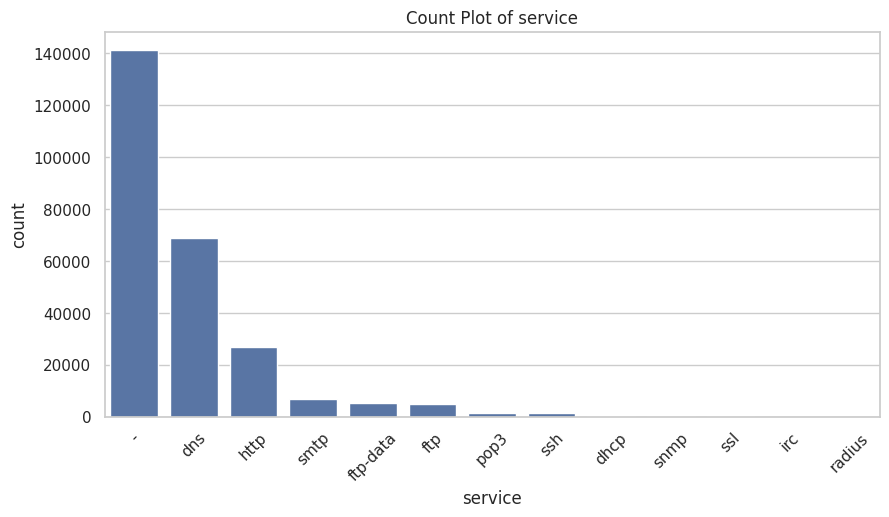

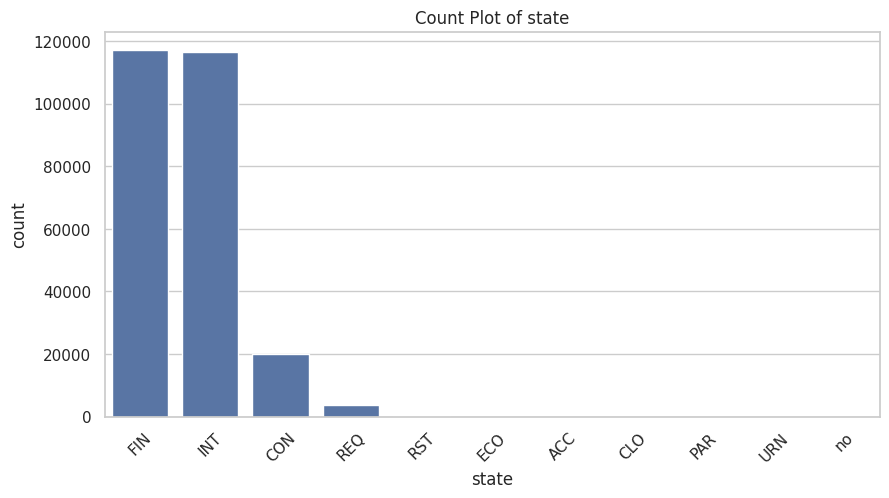

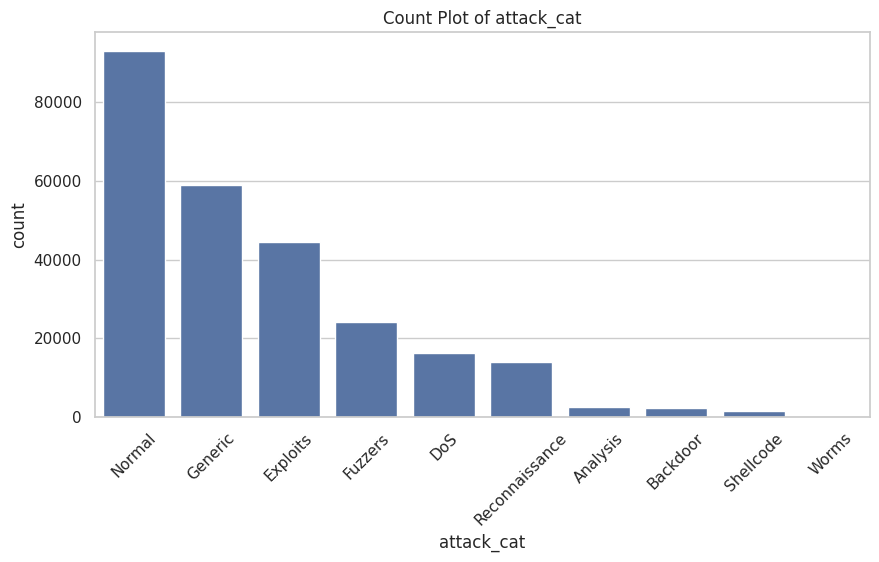

In [40]:
# Categorical features distribution
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")
    plt.show()

## correlation

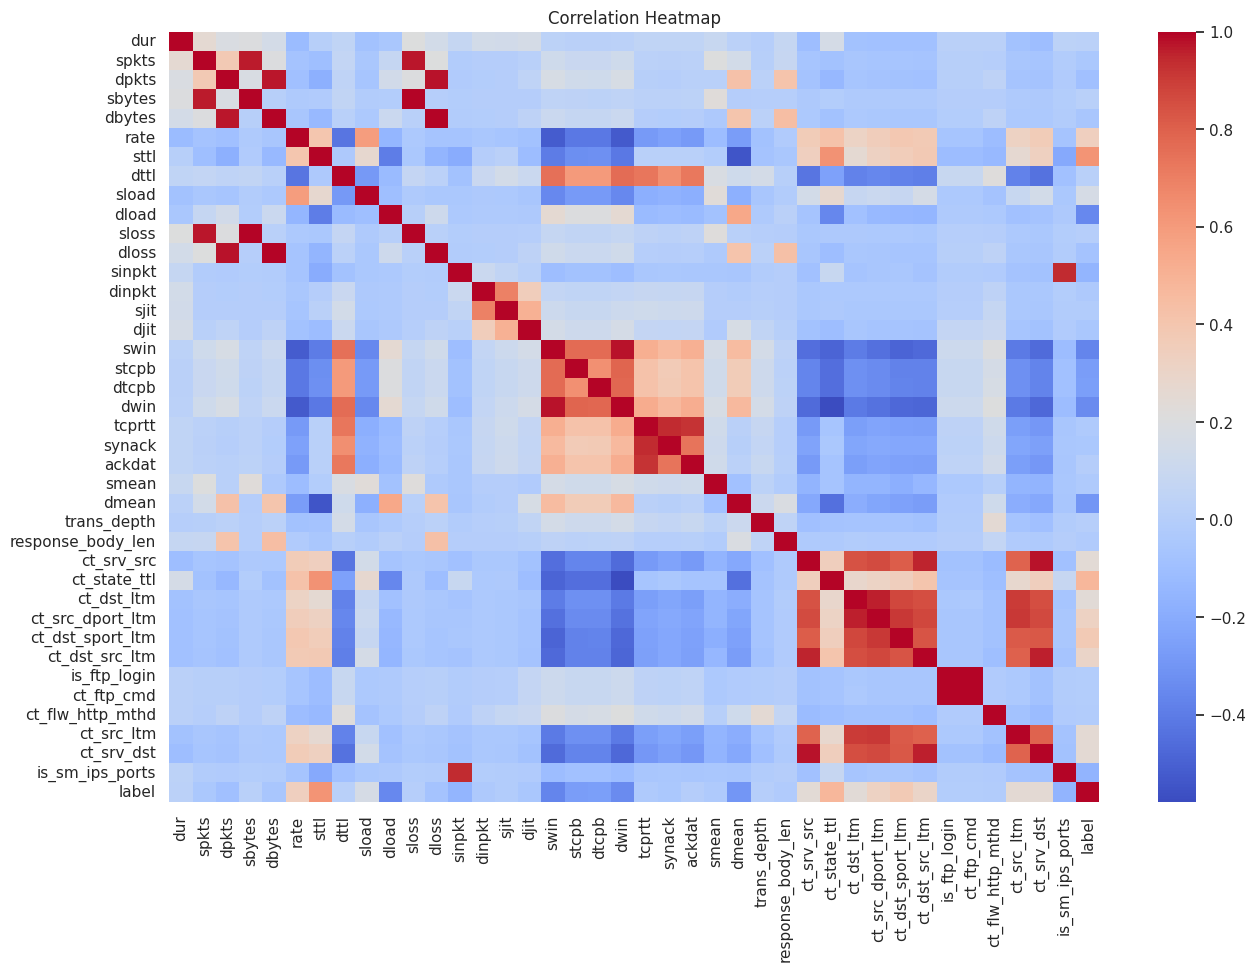

In [41]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


## attack category analysis

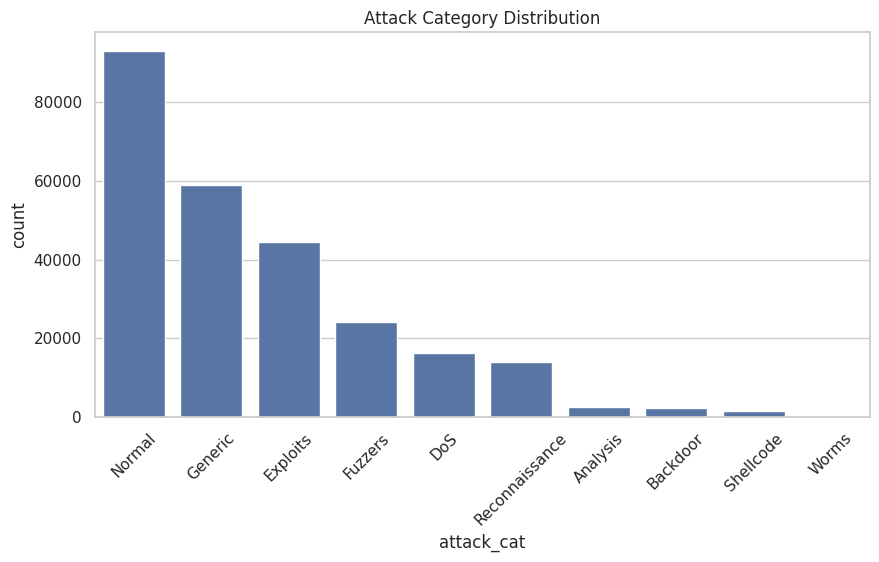

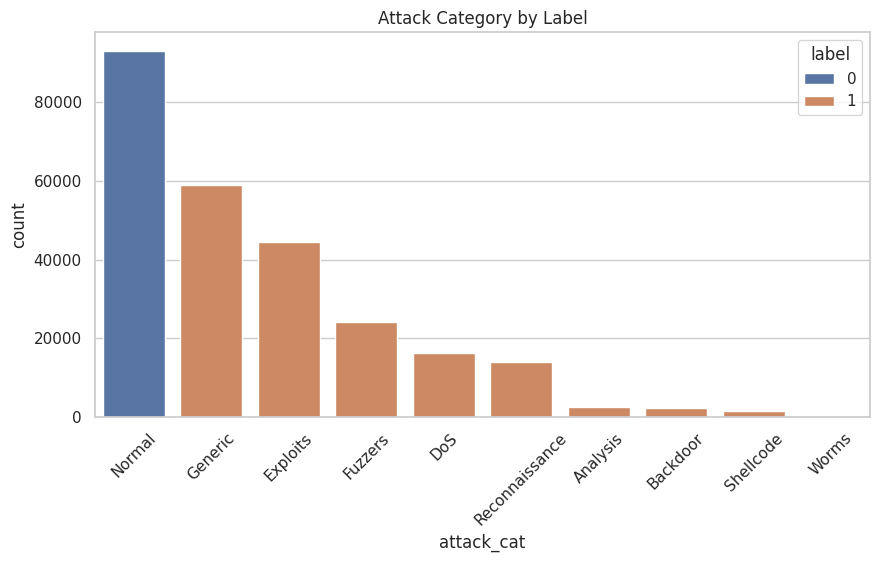

In [42]:
if 'attack_cat' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='attack_cat', order=df['attack_cat'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Attack Category Distribution")
    plt.show()

    # Attack category vs label
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='attack_cat', hue='label', order=df['attack_cat'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Attack Category by Label")
    plt.show()

### scatter plot

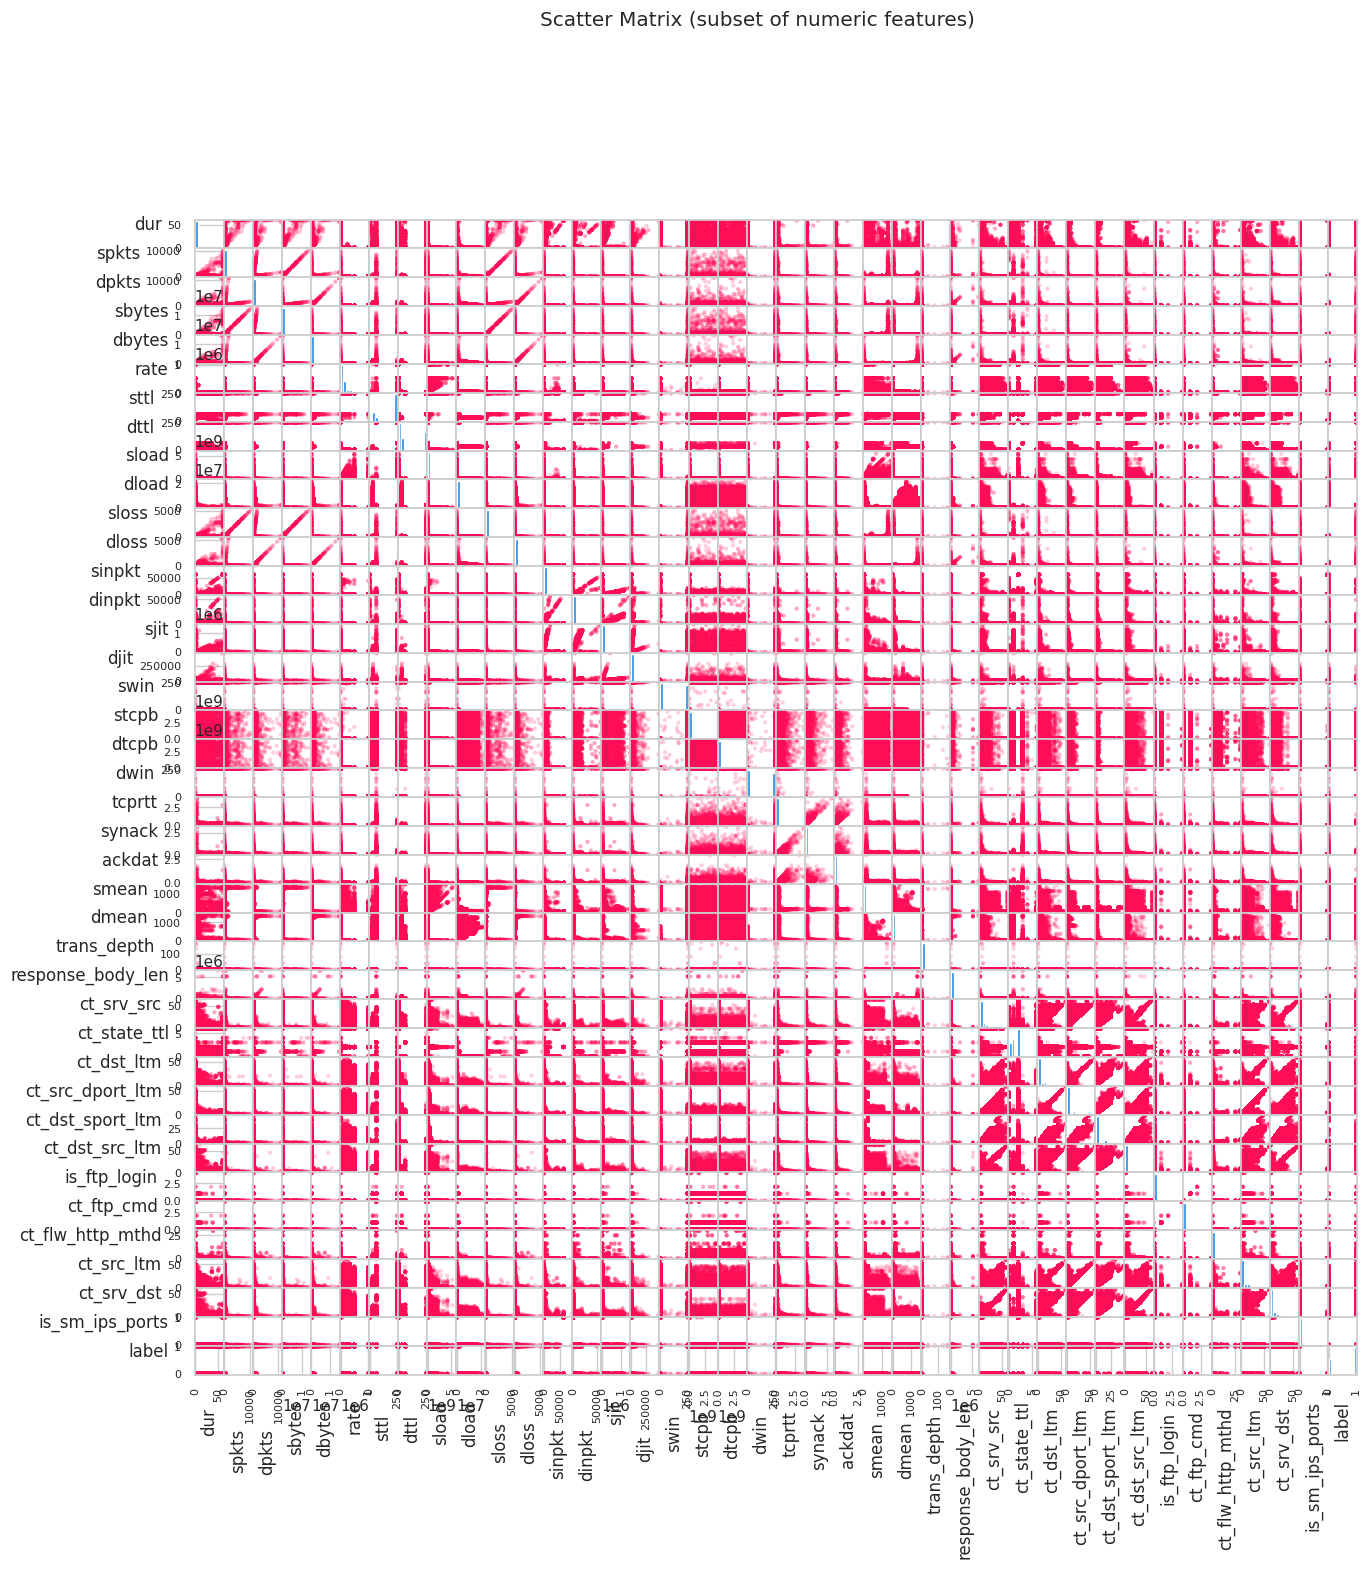

In [45]:
# ===== 7. SCATTER MATRIX (LIMITED TO A SUBSET) =====
from pandas.plotting import scatter_matrix
scatter_features = numeric_cols  # Take first 6 numeric features to keep it readable
axes = scatter_matrix(df[scatter_features], figsize=(15, 15),
                      c='#ff0d57', alpha=0.2,
                      hist_kwds={'color': ['#1E88E5']})

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.suptitle("Scatter Matrix (subset of numeric features)", y=1.02)
plt.show()

## boxplot

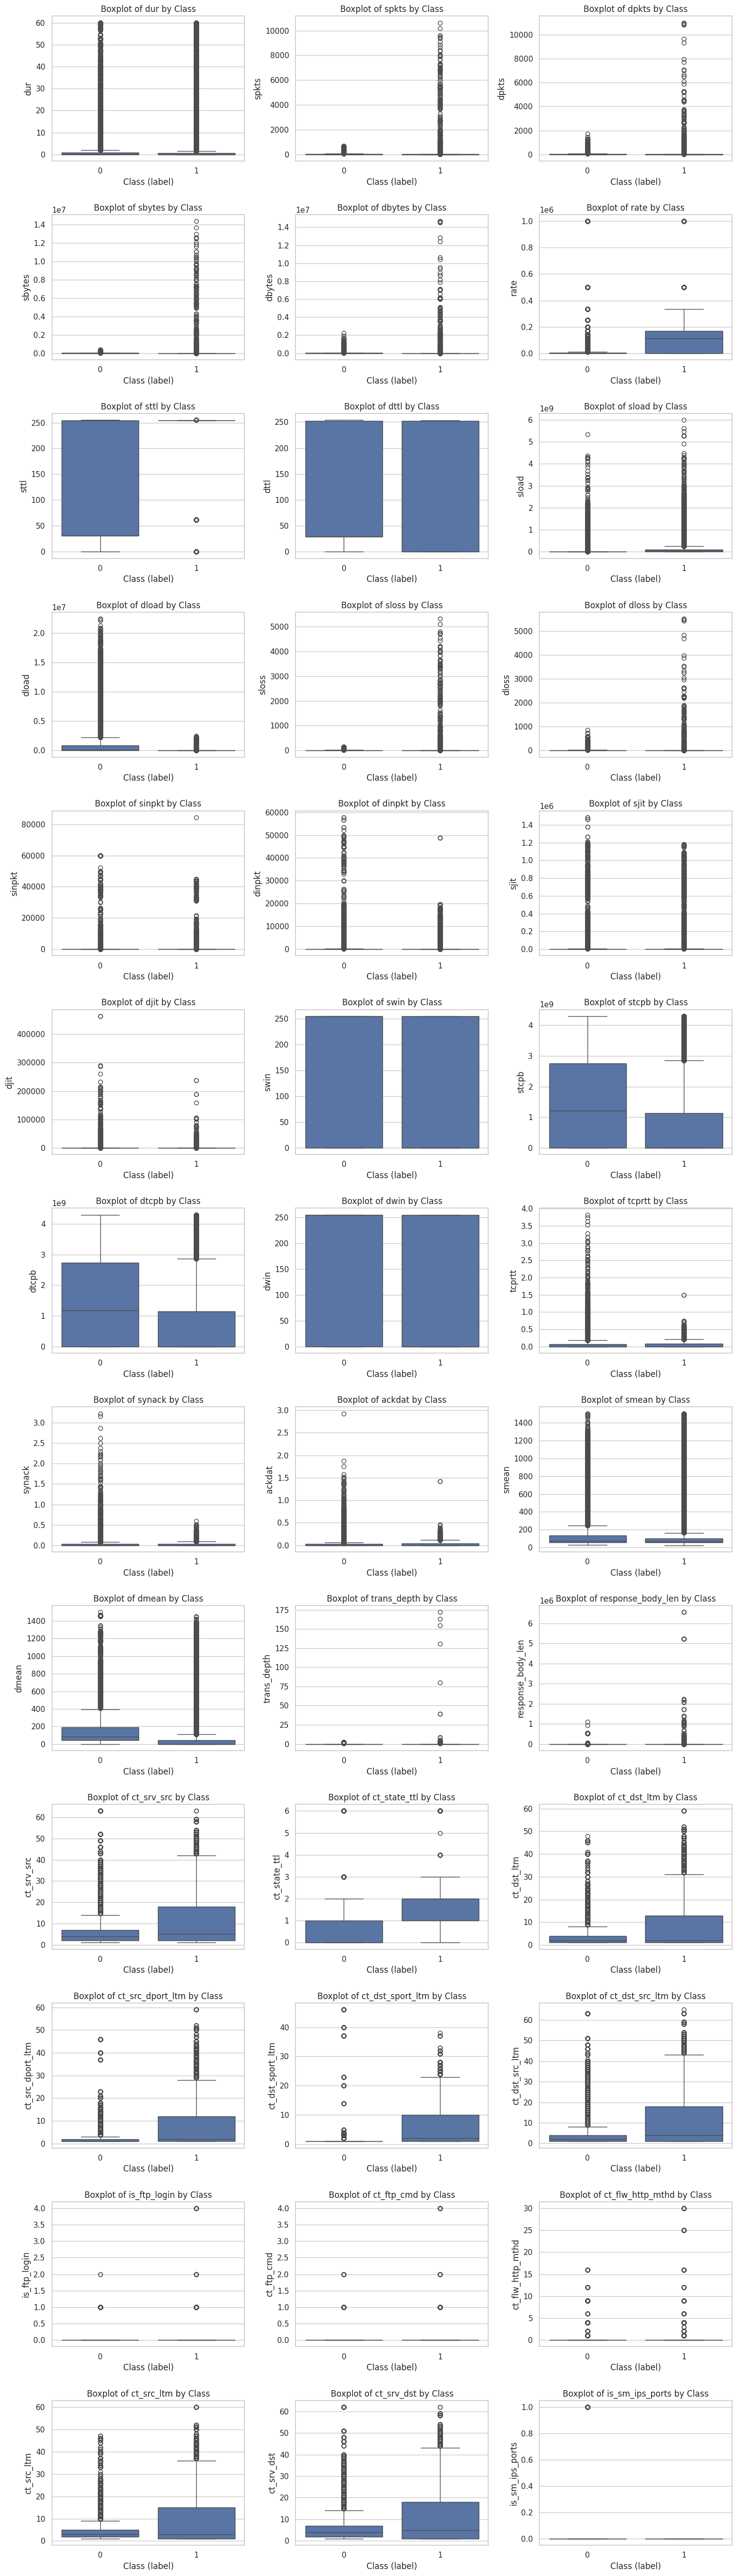

In [46]:
# Select numerical columns, excluding the target variable
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('label')

# Determine the number of rows and columns for the grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create boxplots for each numerical column against the 'label_encoded'
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='label', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Class')
    axes[i].set_xlabel('Class (label)')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Top 15 features most correlated with the label:

sttl                0.624082
ct_state_ttl        0.476559
ct_dst_sport_ltm    0.371672
swin                0.364877
dload               0.352169
dwin                0.339166
rate                0.335883
ct_src_dport_ltm    0.318518
ct_dst_src_ltm      0.299609
dmean               0.295173
stcpb               0.266585
dtcpb               0.263543
ct_src_ltm          0.252498
ct_srv_dst          0.247812
ct_srv_src          0.246596
Name: Label_encoded, dtype: float64


/tmp/ipython-input-674189610.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")


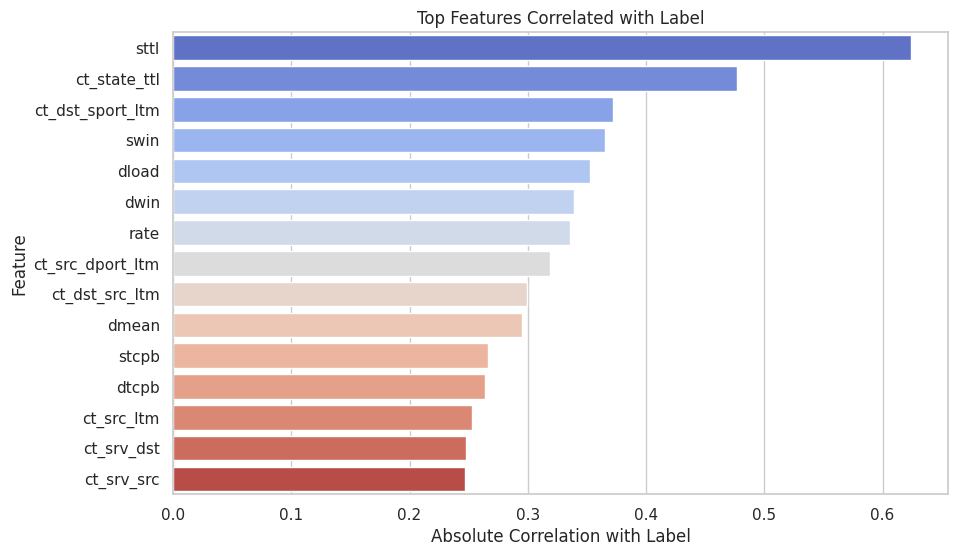

In [47]:
# Encode Label if it's categorical
if df['label'].dtype == 'object':
    df['Label_encoded'] = df['label_encoded'].astype('category').cat.codes
else:
    df['Label_encoded'] = df['label']

# Select numeric features, including Label_encoded
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(columns=['label'])


# If 'Label_encoded' is not in numeric_df, add it
if 'Label_encoded' not in numeric_df.columns:
    numeric_df['Label_encoded'] = df['Label_encoded']

# Correlation with encoded label
corr = numeric_df.corr()['Label_encoded'].abs().sort_values(ascending=False)

# Display top N correlated features (excluding Label itself)
top_features = corr.drop('Label_encoded').head(15)
print("Top 15 features most correlated with the label:\n")
print(top_features)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")
plt.title("Top Features Correlated with Label")
plt.xlabel("Absolute Correlation with Label")
plt.ylabel("Feature")
plt.show()

## feature importance

Top 15 features based on Mutual Information:

sbytes          0.456574
sload           0.339947
ct_state_ttl    0.339225
dbytes          0.338547
sttl            0.338164
smean           0.334485
dttl            0.314582
rate            0.313837
dur             0.302890
dmean           0.282520
dinpkt          0.270760
dload           0.252166
dpkts           0.242886
sinpkt          0.225521
synack          0.217232
dtype: float64


/tmp/ipython-input-3526279145.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")


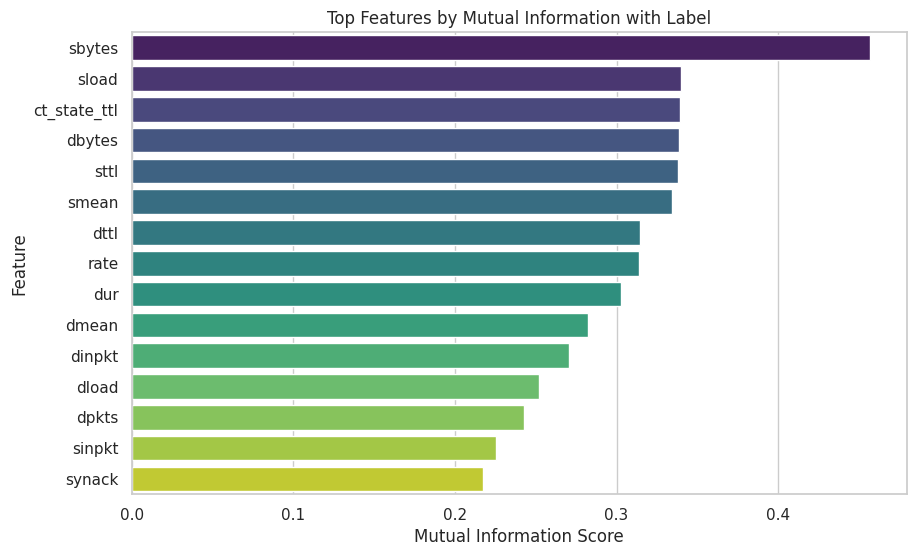

In [48]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['label', 'Label_encoded'])
y = df['Label_encoded']

# Select only numeric columns for X
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Compute mutual information
mi = mutual_info_classif(X_numeric, y, discrete_features='auto')
mi_series = pd.Series(mi, index=X_numeric.columns).sort_values(ascending=False)

# Top N features
top_mi = mi_series.head(15)
print("Top 15 features based on Mutual Information:\n")
print(top_mi)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mi.values, y=top_mi.index, palette="viridis")
plt.title("Top Features by Mutual Information with Label")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()